## The Iris dataset

The Iris dataset is a classic dataset from the 1930s; it is one of the first modern examples of statistical classification.

The dataset is a collection of morphological measurements of several Iris flowers. These measurements will enable us to distinguish multiple species of the flowers. Today, species are identified by their DNA fingerprints, but in the 1930s, DNA's role in genetics had not yet been discovered.

- 150 observations
- 4 features (all measured in centimeters)
    - sepal length
    - sepal width
    - petal length
    - petal width
- Response variable is the iris species
    - Setosa
    - Versicolour
    - Virginica
- Classification problem since response is categorical

In [1]:
from IPython.display import Image
Image(url='https://i1.wp.com/dataaspirant.com/wp-content/uploads/2017/01/irises.png')

*If we saw a new flower out in the field, could we make a good prediction about its species from its measurements?*


 ## Import libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="white")

from pandas.tools.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm  
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

## Load Dataset
I am using pandas to load the data. And also use pandas next to explore the data both with descriptive statistics and data visualization.

In [3]:
# Load the data directly from the UCI Machine Learning repository.
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Specifying the names of each column when loading the data.
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']

# Create DataFrame 
iris_df = pd.read_csv(url, names=names)

## Summarize the Dataset

- Dimensions of the dataset.
- Peek at the data itself.
- Statistical summary of all attributes.
- Breakdown of the data by the class variable.

**Dimensions of the dataset**

There are 150 instances and 5 attributes

In [4]:
print(iris_df.shape)

(150, 5)


** Peek at the Data**

The first 20 rows of the data.

In [5]:
print(iris_df.head(20))

    sepal-length  sepal-width  petal-length  petal-width      species
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

**Statistical Summary**

Now we can take a look at a summary of each attribute. This includes the count, mean, the min and max values as well as some percentiles.

- *We can see that all of the numerical values have the same scale (centimeters) and similar ranges between 0 and 8 centimeters.*

In [6]:
iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal-length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal-width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal-length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal-width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


**Distribution**

Let’s now take a look at the number of instances (rows) that belong to each class. 
- *We can see that each class has the same number of instances (50 or 33% of the dataset).* 

In [7]:
# Count example of each species in dataset.
iris_df.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

##  Data Visualization

- Univariate plots to better understand each attribute.
- Multivariate plots to better understand the relationships between attributes.

### Univariate Plots

I started with some univariate plots, that is, plots of each individual variable. Given that the input variables are numeric, I created box and whisker plots of each.

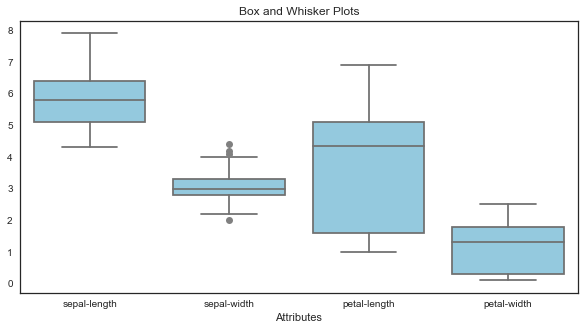

In [8]:
plt.rc("figure", figsize=(10, 5))
flierprops = dict(marker='o',markersize=7,markerfacecolor='gray')
bxplt = sns.boxplot(data=iris_df,color='skyblue',flierprops=flierprops)
plt.title('Box and Whisker Plots')
plt.xlabel('Attributes')
plt.show()

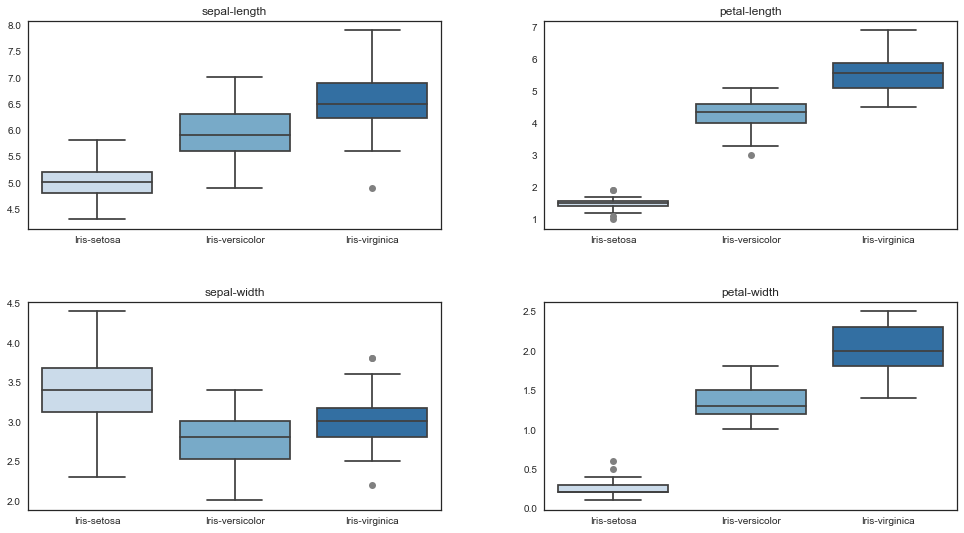

In [9]:
plt.subplots(1,2,figsize=(15,9))
for i, var in enumerate(['sepal-length', 'petal-length','sepal-width','petal-width']):
    # Boxplot
    plt.subplot(221 + i)
    sns.boxplot(x=iris_df['species'],y=var,data=iris_df,palette='Blues',flierprops=flierprops)
    plt.xlabel(' ')
    plt.ylabel(' ')
    plt.title(var)
    
# Subplots spacing
plt.subplots_adjust(left=0.04, right=0.9, wspace=0.25, hspace=0.35)

**Data Distribution Plot of all attributes.**

It looks like perhaps two of the input variables have a Gaussian Distribution.

In [10]:
attr = iris_df.iloc[:,:-1]

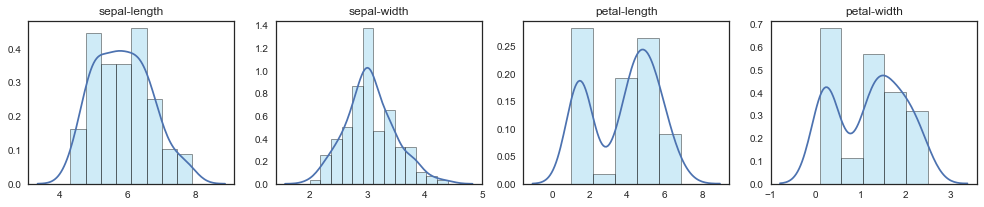

In [11]:
def dist_plot(df, attributes, n_rows, n_cols):
    fig = plt.figure(figsize=(17,3))
    for i, attributes in enumerate(attributes):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        sns.distplot(df[attributes],hist_kws=dict(edgecolor="k", linewidth=1,color='skyblue'))
        plt.title(attributes)
        plt.xlabel('')
        
dist_plot(iris_df, attr.columns, 1, 4)

### Bivariate Plots
Let’s look at scatterplots of all pairs of attributes. This can be helpful to spot relationships between input variables.


- petal length and petal width are the most useful features to identify various flower types.
- While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).


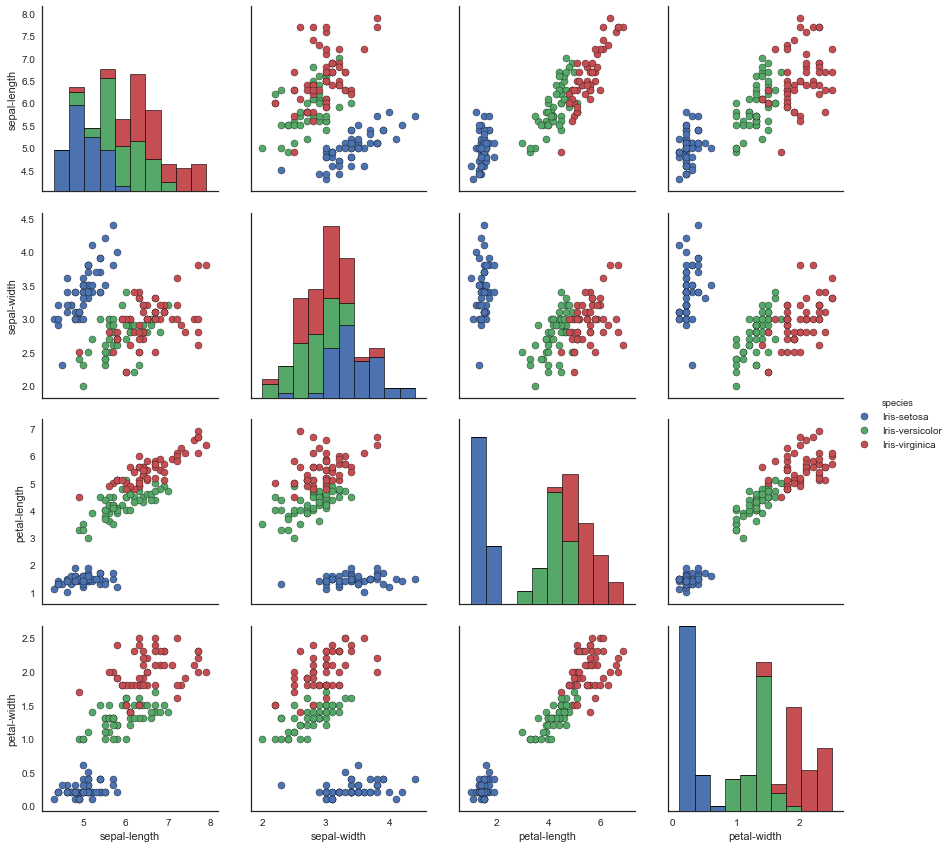

In [12]:
# Pairplot which shows the bivariate relation among features.
sns.pairplot(iris_df, hue="species", size=3,
             plot_kws=dict(s=50, edgecolor="k", linewidth=0.3),
             diag_kws=dict(edgecolor="k", linewidth=0.6));

Let’s take the individual features like sepal, petal length, and weight and let’s visualize the corresponding target species with different colors.

** Visualizing the relationship between sepal and target classes**

I plotted sepal vs petal grouping them in 3 species.
- As you can see in the scatterplot that blue datapoints which is "setosa" is well separated.
- Using sepal length and sepal width features, can distinguish Setosa flowers from others.
- Seperating Versicolor from Viginica is much harder as they have considerable overlap.

In [13]:
iris_df['species'] = iris_df['species'].map({'Iris-setosa':0, 'Iris-versicolor':1,  'Iris-virginica':2})

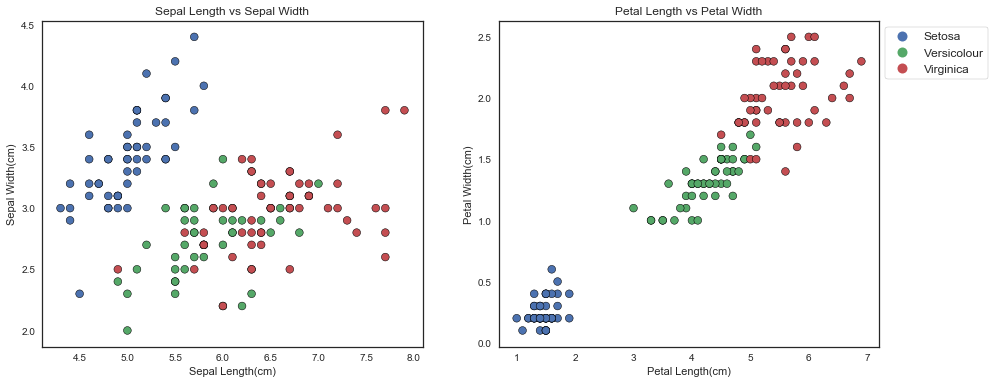

In [14]:
# Start with a plot figure of size 12 units wide & 3 units tall
plt.figure(figsize=(15,6))

target = iris_df['species'].to_frame('species')
# Create an array of three colours, one for each species.
color = np.array(['#4c72b0','#55a868', '#c44e52'])


plt.subplot(1,2,1)
plt.scatter(iris_df['sepal-length'], iris_df['sepal-width'], c=color[target['species']], s=60,edgecolor='k',linewidth=0.5)
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length(cm)')
plt.ylabel('Sepal Width(cm)')

plt.subplot(1,2,2)
plt.scatter(iris_df['petal-length'], iris_df['petal-width'], c= color[target['species']], s=60,edgecolor='k',linewidth=0.5)
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length(cm)')
plt.ylabel('Petal Width(cm)')

# Legend
colors = ['#4c72b0','#55a868', '#c44e52']
texts = ['Setosa' , 'Versicolour', 'Virginica']
patches = [ plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
plt.legend(handles=patches,loc='upper left', bbox_to_anchor=(1,1),frameon=True,fontsize='medium',edgecolor='gray' )

plt.show()

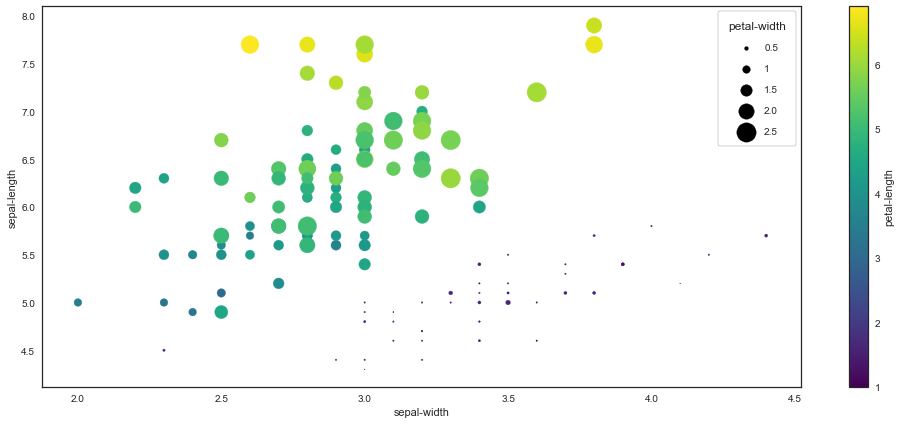

In [15]:
plt.rc("figure", figsize=(17, 7))
plt.scatter(iris_df['sepal-width'], iris_df['sepal-length'], 
            c = iris_df['petal-length'], s=(iris_df['petal-width']**2)*60, cmap='viridis')
ax = plt.gca()
plt.colorbar(label="petal-length")
plt.xlabel("sepal-width")
plt.ylabel("sepal-length")

# legend
pws = [0.5, 1, 1.5, 2., 2.5]
for pw in pws:
    plt.scatter([], [], s=(pw**2)*60, c="k",label=str(pw))
h, l = plt.gca().get_legend_handles_labels()
plt.legend(h[1:], l[1:], labelspacing=1.2, title="petal-width", borderpad=1, 
          frameon=True, framealpha=0.6, edgecolor="k", facecolor="w")
plt.show()

### Correlations Among Feautres

- Sepal Length and Sepal Width show weak correlations. 
- Petal Width and Petal Length show strong correlations. 

The species can be identified better using Petal compared to Sepal. 

In [16]:
X=iris_df.drop(['species'],axis=1)
y=iris_df['species']

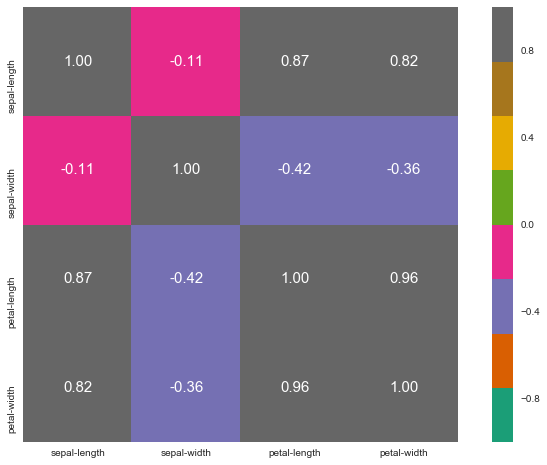

In [17]:
plt.figure(figsize=(12,8)) 
# Heatmap with input as the correlation matrix calculted by(df.corr())
sns.heatmap(X.corr(),cbar = True, square = True, annot=True, fmt='.2f',annot_kws={'size': 15},cmap='Dark2') 
plt.show()


## K-nearest neighbors (KNN) Classification

- Pick a value for K.
- Search for the K observations in the training data that are "nearest" to the measurements of the unknown iris.
- Use the most popular response value from the K nearest neighbors as the predicted response value for the unknown iris.

### Create a Validation Dataset


Using statistical methods to estimate the accuracy of the models for unseen data.

I will split the dataset into two, 70% of which I will use to train our models and 30% that I will hold back as a validation dataset.

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=7)

**n_neighbors = 2**  tell knn object that when it runs the k nearest neighbors algorithm it should be looking for the **"two"** nearest neighbor and known as a ** tuning parameter** or **hyperparameter**.

In [19]:
# Instantiate the estimator
knn = KNeighborsClassifier(n_neighbors = 7, metric='minkowski',p=2,)

In [20]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Fitting classifier to the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

### Predict the response for a new observation
- New observation are called "out-of-sample" data
- uses the information it learned during model training process

In [22]:
y_pred = knn.predict(X_test)

### Accuracy

In [23]:
print('The Accuracy of the KNN Classifier is {:,.2%} on training data'.format(knn.score(X_train, y_train)))
print('The Accuracy of the KNN Classifier is {:,.2%} on test data'.format(knn.score(X_test, y_test)))

The Accuracy of the KNN Classifier is 97.14% on training data
The Accuracy of the KNN Classifier is 95.56% on test data


In [24]:
from sklearn.metrics import accuracy_score
print ('The Accuracy of the KNN Classifier is {:,.2%}'.format(accuracy_score(y_test,y_pred)))

The Accuracy of the KNN Classifier is 95.56%


In [25]:
species_names = ['Setosa','Versicolour','Virginica']

### Confusion Matrix
Confusion matrix used to evaluate the quality of the output of a classifier on the Iris Dataset. The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.


- The Diagonal elements show the number of correct classifications for each species: 12, 16 and 15.
- The off-diagonal elements provides the misclassifications: 2 of the species virginica were misclassified.

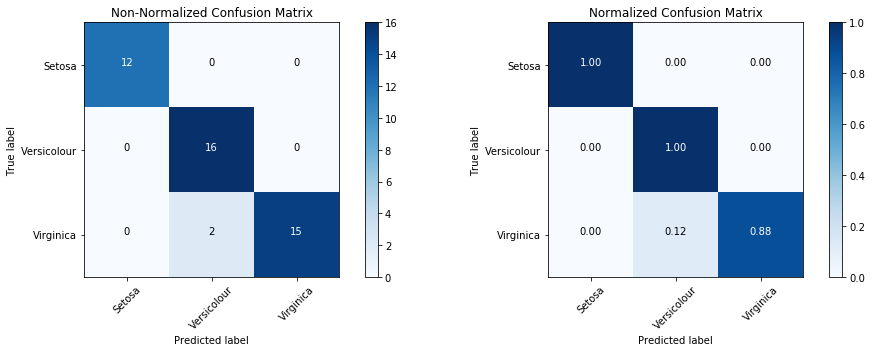

In [26]:
import itertools

# Restore all RC params to original settings
sns.reset_orig()

def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):

# This function prints and plots the confusion matrix. Normalization can be applied by setting normalize=True.

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    else:
        print()
    print()

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)


plt.subplots(1,2,figsize=(14,5))

# Plot non-normalized confusion matrix
plt.subplot(1,2,1)
plot_confusion_matrix(cnf_matrix, classes=species_names,title='Non-Normalized Confusion Matrix')

# Plot normalized confusion matrix
plt.subplot(1,2,2)
plot_confusion_matrix(cnf_matrix, classes=species_names, normalize=True,title='Normalized Confusion Matrix')

plt.show()

### Classification Report
The classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results (granted the validation dataset was small).

In [27]:
# Make predictions on validation dataset
print('\nClasification Report\n',classification_report(y_test, y_pred,target_names=species_names, digits=4))


Clasification Report
              precision    recall  f1-score   support

     Setosa     1.0000    1.0000    1.0000        12
Versicolour     0.8889    1.0000    0.9412        16
  Virginica     1.0000    0.8824    0.9375        17

avg / total     0.9605    0.9556    0.9555        45



In [28]:
X = np.array(iris_df[['petal-length','petal-width']])
y = np.array(iris_df['species'])

# we create an instance of Neighbours Classifier and fit the data.
n_neighbors=7
knn = neighbors.KNeighborsClassifier(n_neighbors,p=2, metric='minkowski')
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [29]:
species_names = {0:'Setosa', 1:'Versicolor', 2:'Virginica'}

In [30]:
# Create color maps
from matplotlib.colors import ListedColormap
colors = {0: '#4c72b0', 1: '#55a868', 2: '#c44e52'}
cmap_light = ListedColormap(['#a6cee3','#a5e7b4', '#f28a8d'])

def plot_decision_regions(X, y, classifier, test_idx=None, h=0.02):
    # calculate min, max and limits
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
 
    # predict class using data and kNN classifier
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
 
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(15,8)) 
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    #for cl in enumerate(np.unique(y)):
    for label in np.unique(y):
        indices = np.where(y == label)
        plt.scatter(X[indices, 0], X[indices, 1], c=colors[label],label=species_names[label],
                    s=70,edgecolor='k',linewidth=0.4)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())  

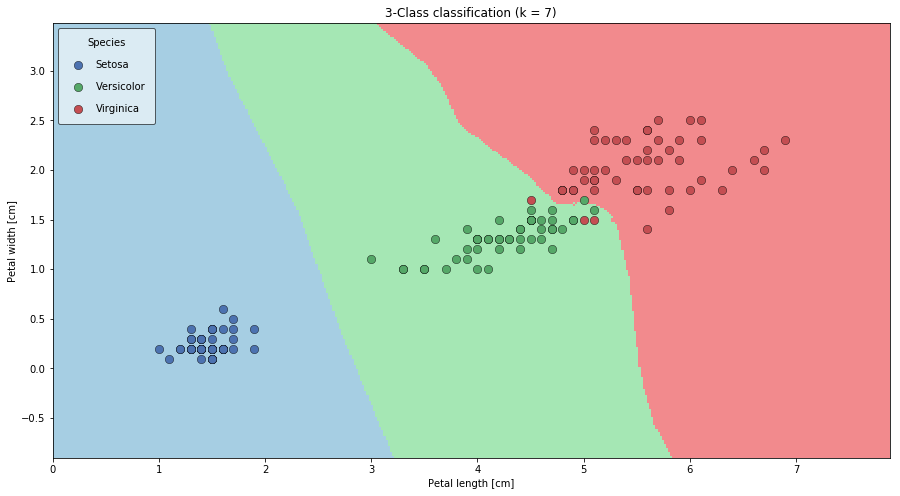

In [31]:
plot_decision_regions(X, y, knn)
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.title("3-Class classification (k = %i)" % (n_neighbors))
plt.legend(labelspacing=1.2, title="Species", borderpad=1, 
          frameon=True, framealpha=0.6, edgecolor="k", loc='upper left')
plt.show()

- Training accuracy rises as model complexity increases
- Testing accuracy penalizes models that are too complex or not complex enough
- For KNN models, complexity is determined by the value of K (lower value = more complex)

The accuracy of the KNN 1 is 0.93
The accuracy of the KNN 2 is 0.91
The accuracy of the KNN 3 is 0.91
The accuracy of the KNN 4 is 0.91
The accuracy of the KNN 5 is 0.91
The accuracy of the KNN 6 is 0.91
The accuracy of the KNN 7 is 0.96
The accuracy of the KNN 8 is 0.93
The accuracy of the KNN 9 is 0.93
The accuracy of the KNN 10 is 0.93
The accuracy of the KNN 11 is 0.93
The accuracy of the KNN 12 is 0.93
The accuracy of the KNN 13 is 0.91
The accuracy of the KNN 14 is 0.93
The accuracy of the KNN 15 is 0.93
The accuracy of the KNN 16 is 0.93
The accuracy of the KNN 17 is 0.89
The accuracy of the KNN 18 is 0.91
The accuracy of the KNN 19 is 0.89
The accuracy of the KNN 20 is 0.89
The accuracy of the KNN 21 is 0.87
The accuracy of the KNN 22 is 0.87
The accuracy of the KNN 23 is 0.89
The accuracy of the KNN 24 is 0.89
The accuracy of the KNN 25 is 0.89


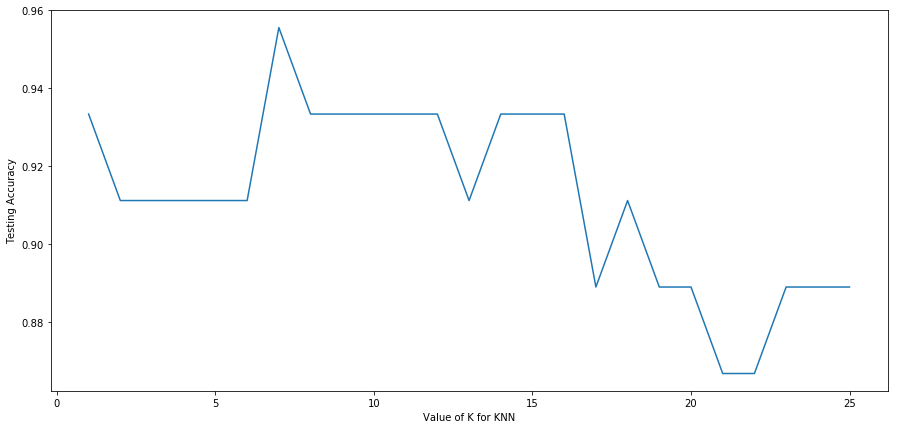

In [32]:
plt.rcParams['figure.figsize'] = 15, 7
# Try K=1 through K=25 and record testing accuracy
scores = []
k_range = list(range(1, 26))
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print('The accuracy of the KNN {} is {:,.2f}'.format( k, accuracy_score(y_test,y_pred)))
    scores.append(accuracy_score(y_test, y_pred))

# Plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()